In [2]:
import pandas as pd 
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , confusion_matrix

In [3]:
## Load data
data = load_digits()

In [4]:
## Creating dataframe from data and feature_names
df = pd.DataFrame(data.data , columns=data.feature_names)

In [5]:
## Dataframe has 1797 rows and 64 columns or features
df.shape

(1797, 64)

In [6]:
df.head(5)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [8]:
# lets see the images and they respective labels
# by creating a list with values
imagens = list(zip(data.images , data.target))

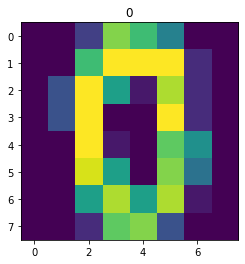

In [31]:
# then, ploting 
rownumber = 20
plt.title(imagens[rownumber][1])
plt.imshow(imagens[rownumber][0])
plt.show()

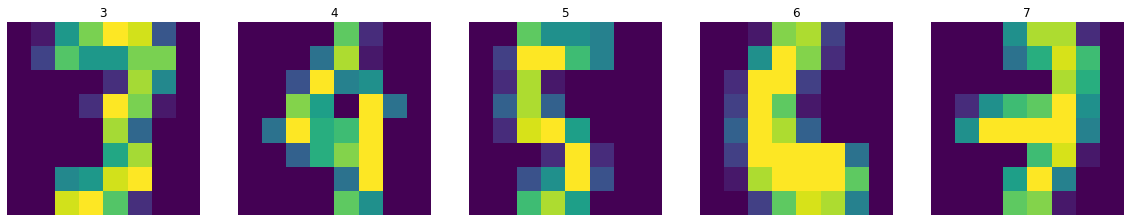

In [47]:
plt.figure(figsize=(20,20))
for index, (image, label) in enumerate(imagens[23:28]):
    plt.subplot(2,5, index + 1)
    plt.axis('off')
    plt.imshow(image) #cmap= plt.cm.gray_r
    plt.title(label)

#### Preprocessing 


##### training and test datasets

In [11]:
x= df
y = data.target 
##creating datasets
x_treino , x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.3, random_state=101)

In [13]:
x_treino.describe().T

,count,mean,std,min,25%,50%,75%,max
pixel_0_0,1257.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel_0_1,1257.0,0.309467,0.943726,0.0,0.0,0.0,0.0,8.0
pixel_0_2,1257.0,5.128878,4.707455,0.0,1.0,4.0,9.0,16.0
pixel_0_3,1257.0,11.782816,4.297432,0.0,10.0,13.0,15.0,16.0
pixel_0_4,1257.0,11.746221,4.388938,0.0,9.0,13.0,15.0,16.0
...,...,...,...,...,...,...,...,...
pixel_7_3,1257.0,12.092283,4.409502,0.0,11.0,13.0,16.0,16.0
pixel_7_4,1257.0,11.824980,4.882659,0.0,10.0,14.0,16.0,16.0
pixel_7_5,1257.0,6.876691,5.924679,0.0,0.0,6.0,12.0,16.0
pixel_7_6,1257.0,2.198886,4.241728,0.0,0.0,0.0,2.0,16.0


##### normalize data

In [48]:
#defining estimator and training based on all dataset
norm = StandardScaler()
norm.fit(x)

In [16]:
## after that, we must transform our datasets with the same parameters. For that, we may use transform
x_treino = pd.DataFrame(norm.transform(x_treino) , columns = x_treino.columns)
x_teste = pd.DataFrame(norm.transform(x_teste) , columns = x_teste.columns)

In [17]:
x_treino.describe().T

,count,mean,std,min,25%,50%,75%,max
pixel_0_0,1257.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
pixel_0_1,1257.0,0.006205,1.040561,-0.335016,-0.335016,-0.335016,-0.335016,8.485857
pixel_0_2,1257.0,-0.015969,0.990313,-1.094937,-0.884566,-0.253452,0.798404,2.271002
pixel_0_3,1257.0,-0.012482,1.011718,-2.786437,-0.432200,0.274072,0.744919,0.980343
pixel_0_4,1257.0,-0.023764,1.023971,-2.764242,-0.664478,0.268751,0.735366,0.968673
...,...,...,...,...,...,...,...,...
pixel_7_3,1257.0,0.000742,1.008237,-2.764171,-0.249010,0.208293,0.894246,0.894246
pixel_7_4,1257.0,0.003214,0.989881,-2.394110,-0.366771,0.444164,0.849632,0.849632
pixel_7_5,1257.0,0.019095,1.004356,-1.146647,-1.146647,-0.129523,0.887602,1.565686
pixel_7_6,1257.0,0.032033,1.037247,-0.505670,-0.505670,-0.505670,-0.016602,3.406875


#### Testing Parameters

In [18]:
## defining the values of k to be used on our test
kvals = range(1,30,1)
acuracias = []

In [19]:
## creating a function to train and then return the accuracy for each value of k
def fncKNN(n):
    modeloKNN = KNeighborsClassifier(n_neighbors=n)
    modeloKNN.fit(x_treino, y_treino)
    ## Avaliando o modelo
    score = modeloKNN.score(x_teste, y_teste)
    return score

In [49]:
for k in kvals:
    result = fncKNN(k)
    acuracias.append([k,result])
    

In [50]:
acuracias = pd.DataFrame(acuracias, columns=['k' , 'score'])

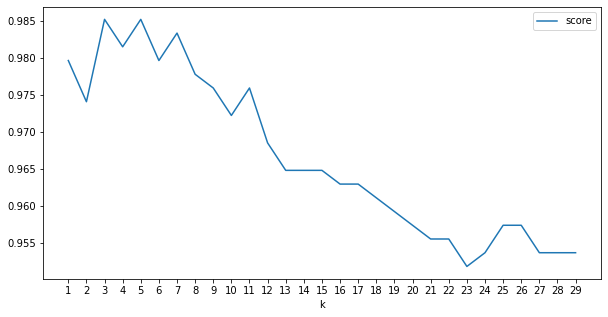

In [52]:
## now we need to plot our result to pick the value of k based on the best accuracy. K = 3
ax= acuracias.plot(x= 'k' , kind= 'line', figsize=(10,5))
plt.xticks(acuracias['k'])
plt.show()

#### Training model

In [53]:

knnModel = KNeighborsClassifier(n_neighbors=3)

In [54]:
knnModel.fit(x_treino, y_treino)

KNeighborsClassifier(n_neighbors=3)

In [55]:
## lets test our model using the test dataset
y_pred = knnModel.predict(x_teste)

In [26]:
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.93      1.00      0.96        55
           2       0.96      1.00      0.98        49
           3       0.96      0.98      0.97        54
           4       1.00      0.98      0.99        61
           5       1.00      1.00      1.00        59
           6       1.00      0.98      0.99        46
           7       1.00      1.00      1.00        56
           8       1.00      0.92      0.96        59
           9       1.00      1.00      1.00        48

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



In [27]:
confusion_matrix(y_teste, y_pred)

array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 55,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 49,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 53,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 60,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 59,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 56,  0,  0],
       [ 0,  2,  1,  2,  0,  0,  0,  0, 54,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 48]], dtype=int64)

In [60]:
## our model has 91.51% of accuracy
knnModel.score(x_teste, y_teste)

0.9851851851851852